#Importing Libraries

In [42]:
import os
import cv2
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import keras
import tensorflow

from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG19
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout, BatchNormalization, Activation

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score 

#Importing Dataset

In [43]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [44]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


#Showing Some Example from the Dataset

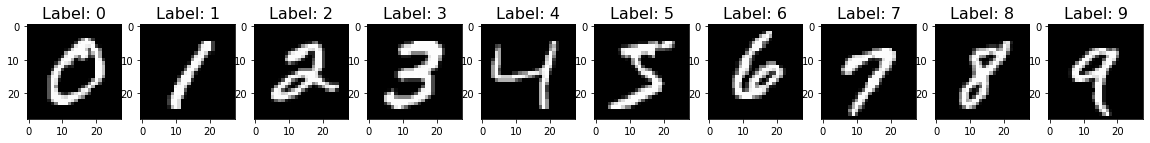

In [45]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

In [46]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [47]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


#Preparing the Dataset

In [48]:
# Normalizing 
x_train = x_train / 255.0
x_test = x_test / 255.0

In [49]:
# Reshaping
# Reshape Data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


#Fully Connected Neural Network

In [50]:
model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [36]:
x_train = x_train/255.0
x_test = x_test/255.0
x_val = x_val/255.0

In [37]:
# Reshape Data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(10929, 2352)


In [51]:
#Training
batch_size = 512
epochs=10
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
118/118 [==============================] - 2s 12ms/step - loss: 0.6059 - accuracy: 0.8248
Epoch 2/10
118/118 [==============================] - 1s 12ms/step - loss: 0.2240 - accuracy: 0.9359
Epoch 3/10
118/118 [==============================] - 2s 18ms/step - loss: 0.1642 - accuracy: 0.9521
Epoch 4/10
118/118 [==============================] - 1s 12ms/step - loss: 0.1314 - accuracy: 0.9614
Epoch 5/10
118/118 [==============================] - 1s 11ms/step - loss: 0.1097 - accuracy: 0.9675
Epoch 6/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0928 - accuracy: 0.9723
Epoch 7/10
118/118 [==============================] - 1s 12ms/step - loss: 0.0811 - accuracy: 0.9749
Epoch 8/10
118/118 [==============================] - 1s 12ms/step - loss: 0.0704 - accuracy: 0.9789
Epoch 9/10
118/118 [==============================] - 1s 12ms/step - loss: 0.0625 - accuracy: 0.9814
Epoch 10/10
118/118 [==============================] - 1s 12ms/step - loss: 0.0547 - accura

#Evaluating the Model


In [52]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.0751 - accuracy: 0.9769
Test Loss: 0.07506554573774338, Test Accuracy: 0.9768999814987183


In [53]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 1s 2ms/step
[[6.9345642e-06 1.3044773e-05 5.6967016e-05 ... 9.9949247e-01
  6.8225172e-06 1.2011731e-04]
 [2.7374858e-06 8.1971913e-05 9.9988180e-01 ... 5.7608913e-09
  4.6983869e-06 5.5002712e-12]
 [3.4458059e-05 9.9739093e-01 2.8247858e-04 ... 9.2292501e-04
  3.3057141e-04 2.4289540e-05]
 ...
 [1.9691714e-10 2.4189019e-08 2.0305029e-09 ... 7.9583270e-07
  3.1318282e-07 2.3782084e-05]
 [3.5675949e-08 7.5569069e-08 1.6168915e-09 ... 3.0119889e-09
  2.3053675e-05 3.9331518e-08]
 [3.0044323e-09 3.4708783e-10 2.6594529e-07 ... 2.2854923e-11
  2.4106830e-09 7.7817635e-13]]
[7 2 1 ... 4 5 6]


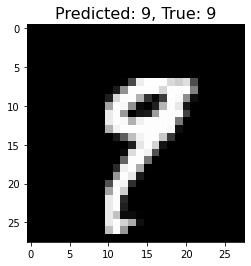

In [56]:
#An Example

random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

#Confusion Matrix

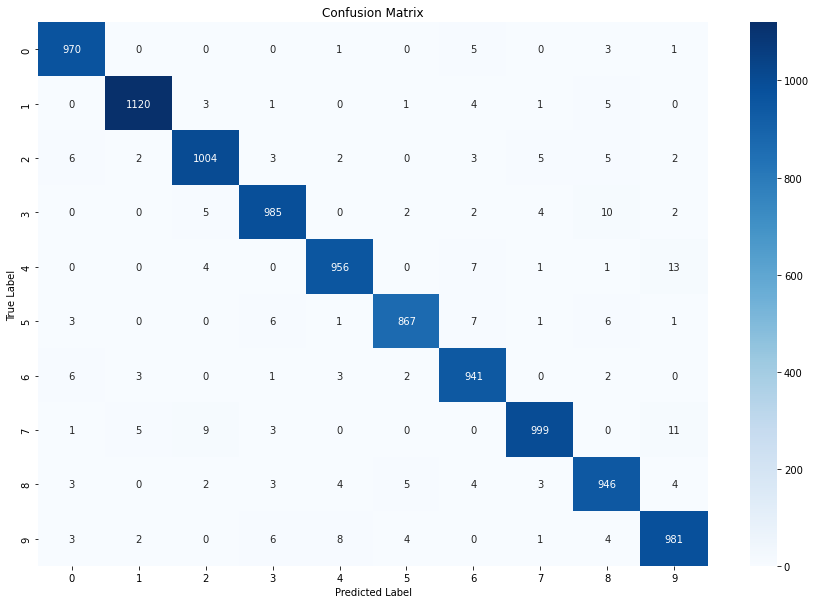

In [57]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

#Investigate Some Errors

In [59]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

In [60]:
y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

# Get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] # 5 last ones

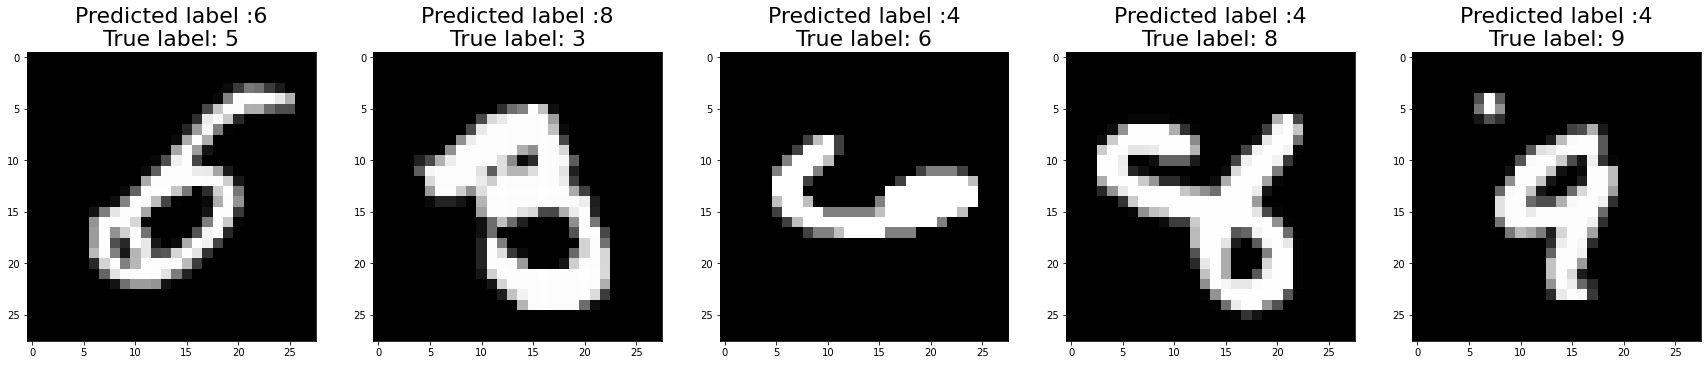

In [61]:
# Showing Top Errors
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30,30))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Predicted label :{}\nTrue label: {}".format(y_p, y_t), fontsize=22)